# Inflate surfaces

In [1]:
# libraries
import numpy as np
from brainspace.plotting import plot_hemispheres
from brainspace.mesh.mesh_io import read_surface
from brainspace.mesh.mesh_creation import build_polydata
import copy

In [2]:
# surfaces
micapipe = '/data_/mica1/01_programs/micapipe-v0.2.0'

inf_lh = read_surface(micapipe+'/surfaces/fsLR-32k.L.inflated.surf.gii', itype='gii')
inf_rh = read_surface(micapipe+'/surfaces/fsLR-32k.R.inflated.surf.gii', itype='gii')

mid_lh = read_surface(micapipe+'/surfaces/fsLR-32k.L.midthickness.surf.gii', itype='gii')
mid_rh = read_surface(micapipe+'/surfaces/fsLR-32k.R.midthickness.surf.gii', itype='gii')

pial_lh = read_surface(micapipe+'/surfaces/fsLR-32k.L.surf.gii', itype='gii')
pial_rh = read_surface(micapipe+'/surfaces/fsLR-32k.R.surf.gii', itype='gii')

sphere_lh = read_surface(micapipe+'/surfaces/fsLR-32k.L.sphere.surf.gii', itype='gii')
sphere_rh = read_surface(micapipe+'/surfaces/fsLR-32k.R.sphere.surf.gii', itype='gii')


In [3]:
def inflate_surf(orig_lh, orig_rh, ref_lh, ref_rh, W=0.15):
    """
    This functions inflates a surface a determined amount [W{0:1}] to a reference
    
    Parameters
    ----------
        orig_lh : vtkPolyData or VTKObjectWrapper
                    left input original surface
        orig_rh : vtkPolyData or VTKObjectWrapper
                    right input original surface
        ref_lh  : vtkPolyData or VTKObjectWrapper
                    left input reference surface
        ref_rh  : vtkPolyData or VTKObjectWrapper
                    right input reference surface
        W       : float value from 0 to 1
        
    Returns
    -------
        new_lh : vtkPolyData or VTKObjectWrapper
                    left output inflated surface
        new_rh : vtkPolyData or VTKObjectWrapper
                    right output inflated surface
        
    """
    def inflate(orig, ref, Winf):
        # Convert BSPolyData objects to numpy arrays
        inf_coord = copy.copy(orig.points)
        inf_triag = copy.copy(orig.GetCells2D())
        
        # Inflated mean surface
        maxs = np.max(orig.points, axis=0)
        mins = np.min(orig.points, axis=0)
        maxsp = np.max(ref.points, axis=0)
        minsp = np.min(ref.points, axis=0)
        
        for i in range(3):
            inf_coord[:,i] = (((ref.points[:, i] - minsp[i]) / (maxsp[i] - minsp[i]))
                                 * (maxs[i] - mins[i]) + mins[i]) * Winf + orig.points[:, i] * (1 - Winf)
        
        # Create the new surface
        new_surf = build_polydata(inf_coord, cells=inf_triag)
        
        return(new_surf)
    
    new_lh = inflate(orig_lh, ref_lh, Winf=W)
    new_rh = inflate(orig_rh, ref_rh, Winf=W)
    
    return(new_lh, new_rh)


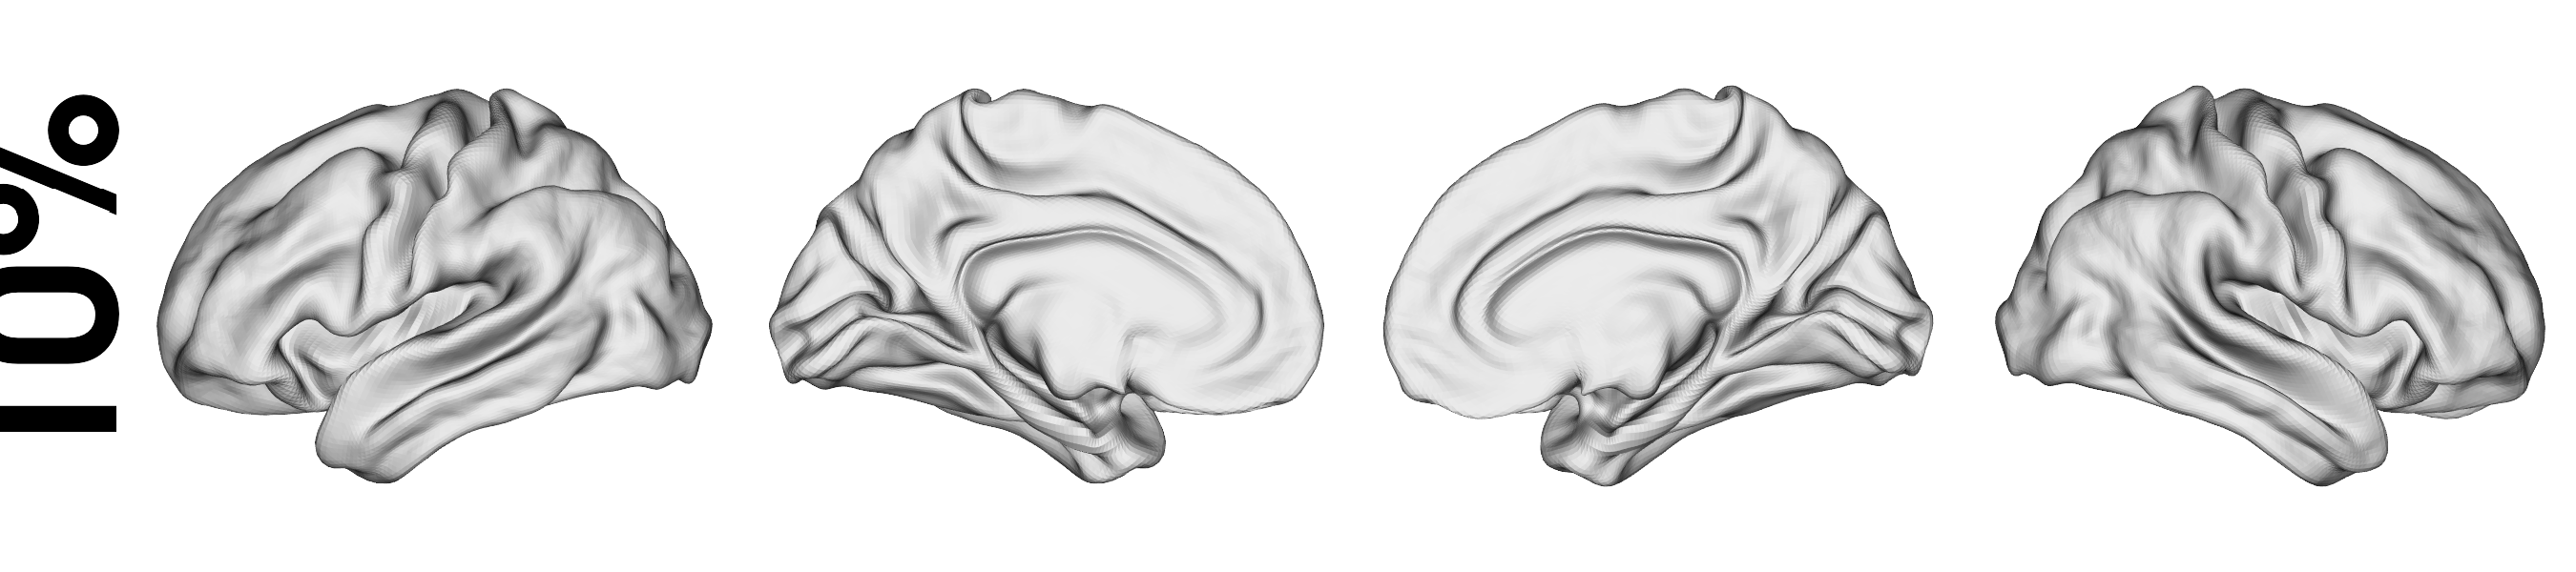

In [4]:
# Inflate the INFLATED surface 10% reference to the sphere
ws_lh, ws_rh = inflate_surf(pial_lh, pial_rh, sphere_lh, sphere_rh, W=0.1)
plot_hemispheres(ws_lh, ws_rh, size=(900, 200), zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1),  transparent_bg=True, label_text=['10%'],
                         screenshot=False, scale=3)


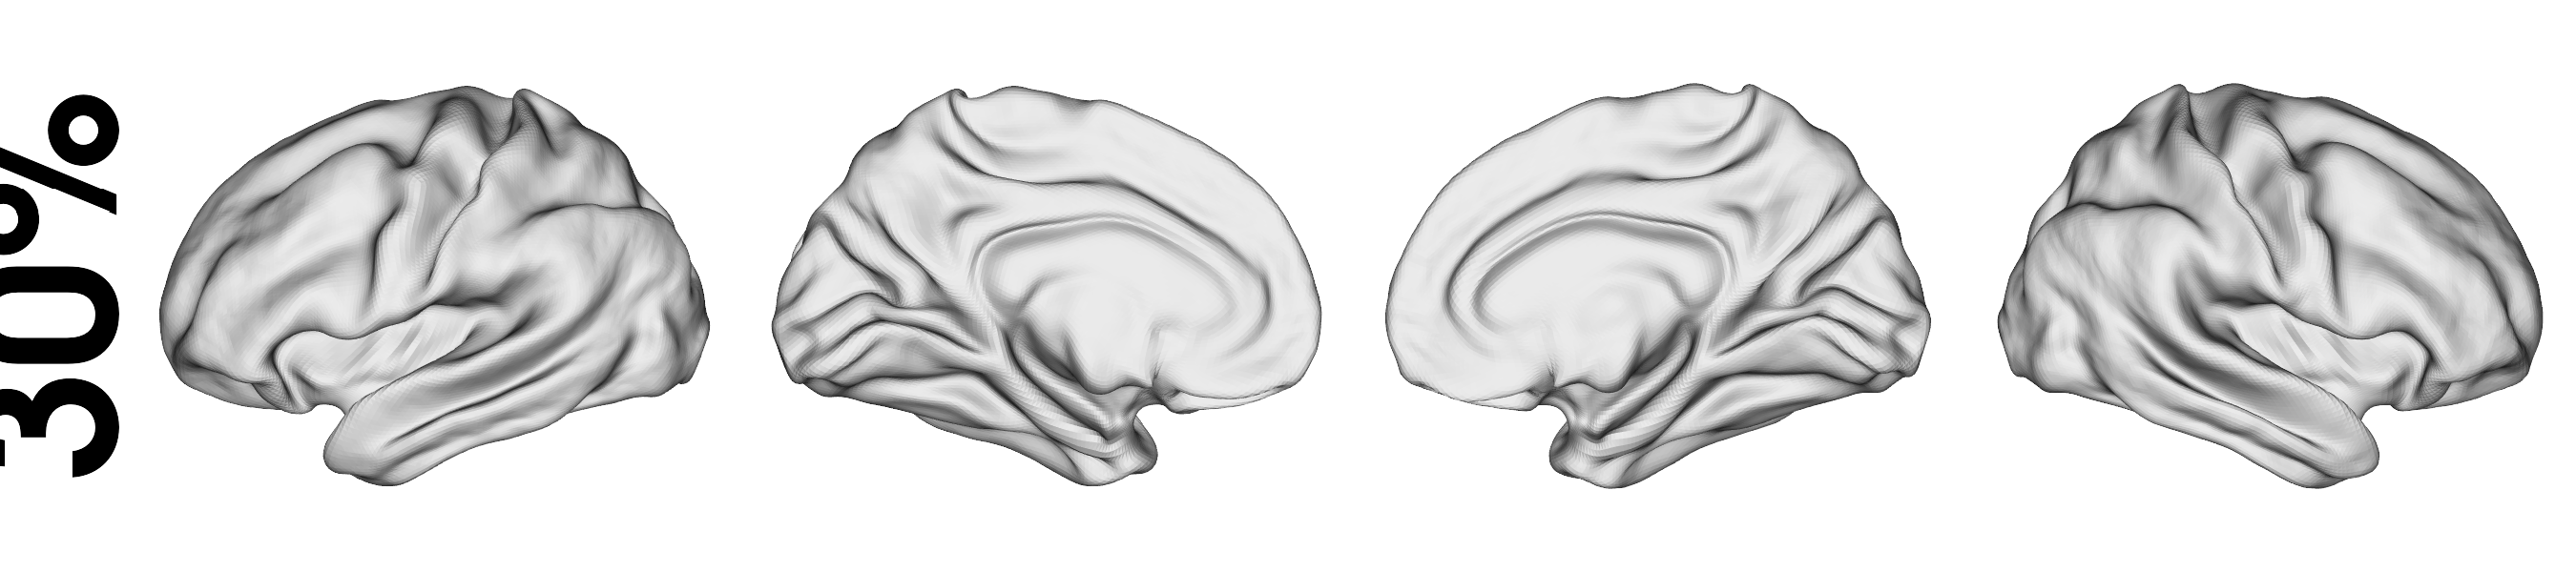

In [5]:
# Inflate the PIAL surface 30% reference to the new inflated surface
w_lh, w_rh = inflate_surf(pial_lh, pial_rh, sphere_lh, sphere_rh, W=0.3)
plot_hemispheres(w_lh, w_rh, size=(900, 200), zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1),  transparent_bg=True, label_text=['30%'],
                         screenshot=False, scale=3)

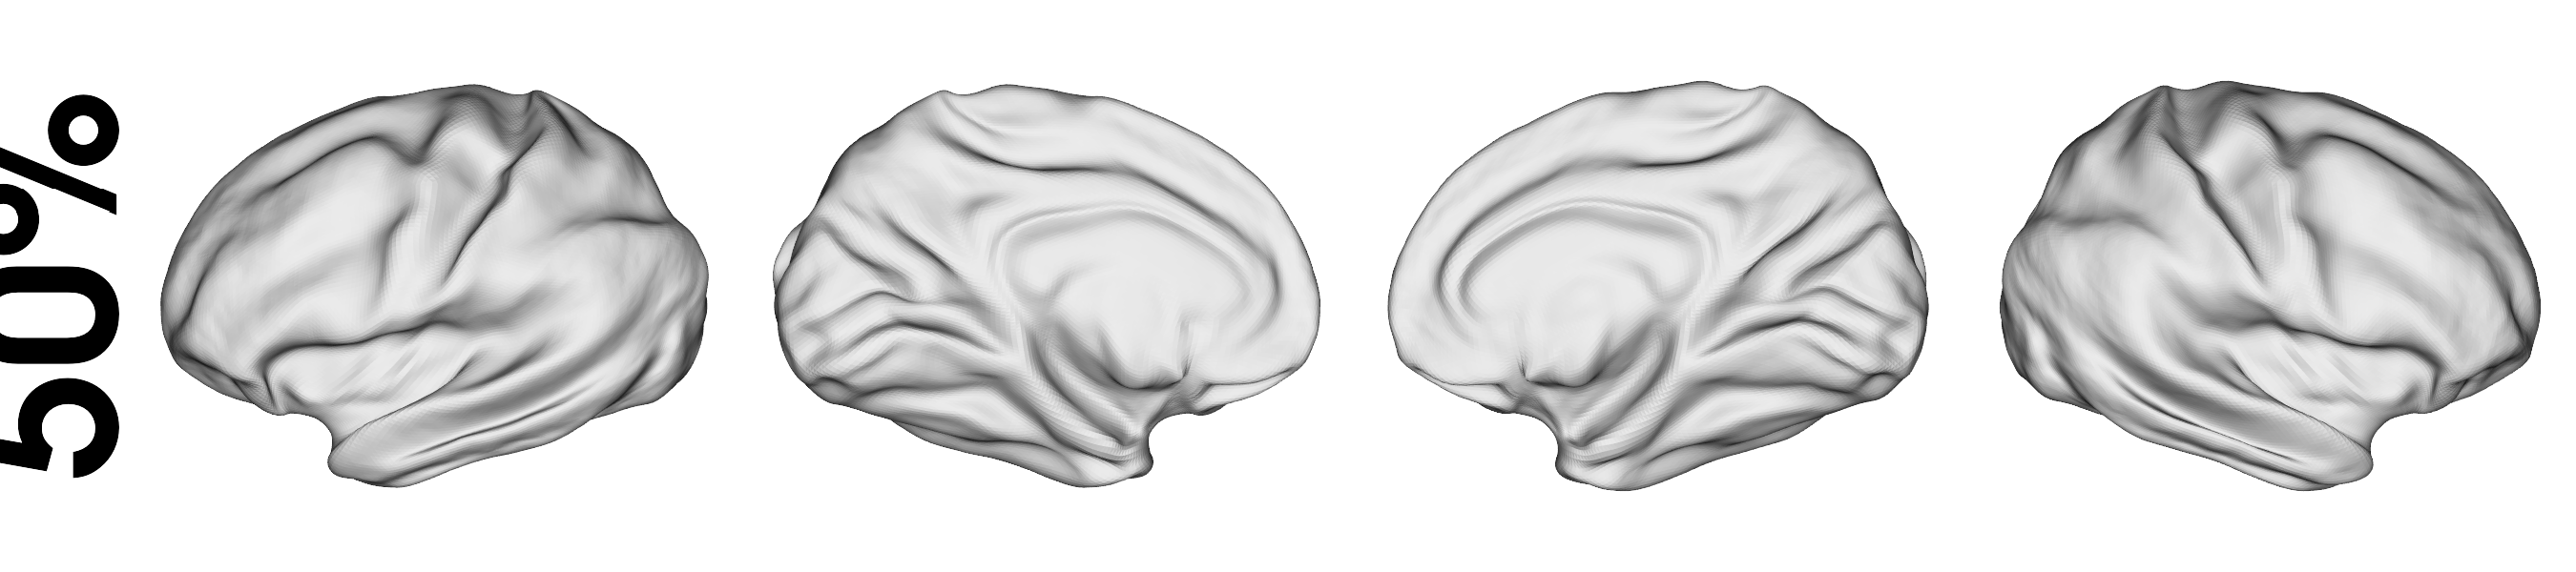

In [6]:
# Inflate the PIAL surface 50% reference to the new inflated surface
w_lh, w_rh = inflate_surf(pial_lh, pial_rh, sphere_lh, sphere_rh, W=0.5)
plot_hemispheres(w_lh, w_rh, size=(900, 200), zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1),  transparent_bg=True, label_text=['50%'],
                         screenshot=False, scale=3)

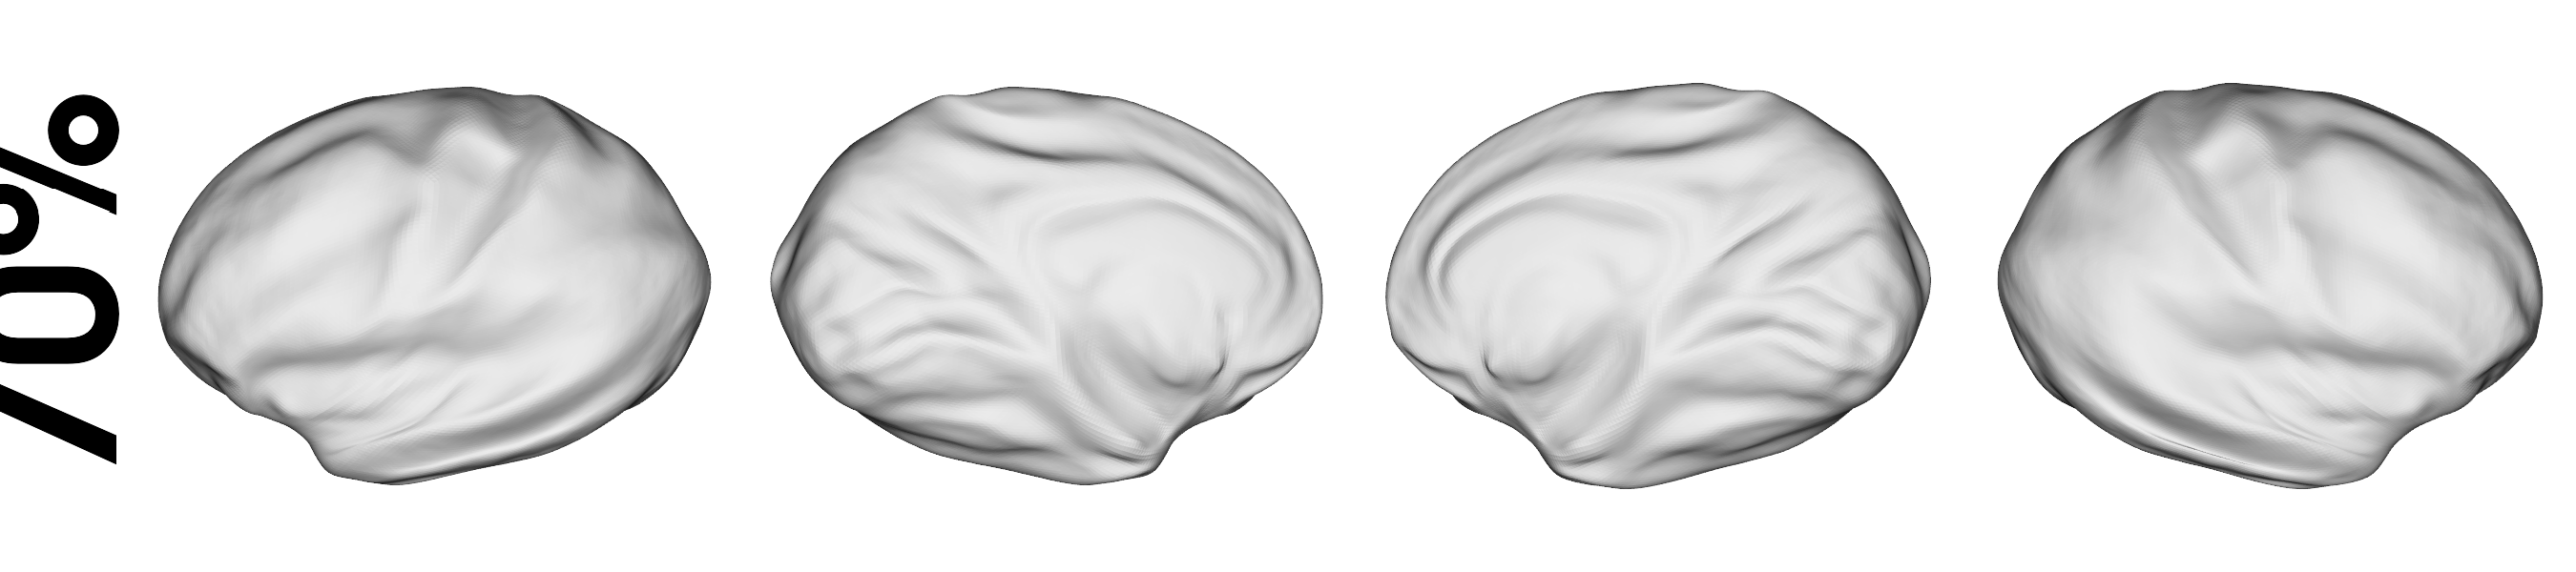

In [7]:
# Inflate the PIAL surface 70% reference to the new inflated surface
w_lh, w_rh = inflate_surf(pial_lh, pial_rh, sphere_lh, sphere_rh, W=0.7)
plot_hemispheres(w_lh, w_rh, size=(900, 200), zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1),  transparent_bg=True, label_text=['70%'],
                         screenshot=False, scale=3)

In [8]:
# Inflate the PIAL surface 100% reference to the new inflated surface
w_lh, w_rh = inflate_surf(pial_lh, pial_rh, sphere_lh, sphere_rh, W=1)
plot_hemispheres(w_lh, w_rh, size=(900, 200), zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1),  transparent_bg=True, label_text=['100%'],
                         screenshot=False, scale=3)